<a href="https://colab.research.google.com/github/Raisler/DataScience_Portfolio/blob/master/TemperatureAnalisys/Bahia_Temperatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![temperature](https://images.vexels.com/media/users/3/144260/isolated/lists/d606d19b021fd53d278b26a11a4b468f-icone-de-temperatura-feber.png)
# **TEMPERATURA**

> Temperatura é um tipo de dado muito legal pra se trabalhar ou buscar aprendizado com muito prática, ele pode ser float, inteiro, celsius ou fahrenheit, etc, e não é tão difícil de entender.
```
print('Hello Data')
```
> Este notebook é sobre um projeto prático de preparação de dados, análise e previsão de séries temporais, e na primeira prática, será utilizado o dataset localizado no link abaixo. Problemas? raisler.dev@gmail.com 

[Link Dataset](https://data.world/data-society/global-climate-change-data)



--------------

@Author: Raisler Voigt


# Objetivos


> Objetivo 1: O dataset são sobre vários estados de vários países, abaixo tentarei entender quais são os países e quais são os estados, o objetivo é pegar algum estado do Brasil e fazer a análise de uma série temporal

> Objetivo 2: Prever a temperatura utilizando a biblioteca do Facebook, Prophet!

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     \ 43.7MB 43.4MB/s
     |████████████████████████████████| 81kB 3.8MB/s 
     |████████████████████████████████| 604kB 8.5MB/s 
     |████████████████████████████████| 3.1MB 12.9MB/s 
     |████████████████████████████████| 71kB 4.2MB/s 
     |████████████████████████████████| 296kB 20.2MB/s 


In [4]:
# Data Structure 
import numpy as np 
import pandas as pd

# Vizualization
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

# Entendendo & Carregando os dados


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Raisler/DataScience_Portfolio/master/TemperatureAnalisys/GlobalLandTemperaturesByState.csv')
df.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil


In [6]:
df.describe() # Aqui eu quero entender os dados da maneira mais simples e rápida possível

,AverageTemperature,AverageTemperatureUncertainty
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [7]:
df['Country'].value_counts() # Vendo os estados existentes em nosso dateset

Russia           254972
United States    149745
India             86664
China             68506
Canada            35358
Brazil            34328
Australia         16102
Name: Country, dtype: int64

In [8]:
Brazil = df['Country'] == 'Brazil'
Brazil = df[Brazil]
Brazil

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
556546,2013-05-01,26.605,0.768,Tocantins,Brazil
556547,2013-06-01,26.646,0.834,Tocantins,Brazil
556548,2013-07-01,26.432,1.003,Tocantins,Brazil
556549,2013-08-01,27.276,0.898,Tocantins,Brazil


In [9]:
# Criado o Dataset apenas com o Brazil, veremos os estados disponíveis
Brazil['State'].value_counts()

Roraima                2277
Rio Grande Do Sul      2181
Pernambuco             2181
Mato Grosso            2181
Bahia                  2181
Rio De Janeiro         2181
Sergipe                2181
Minas Gerais           2181
Tocantins              2181
Alagoas                2181
Santa Catarina         2181
Distrito Federal       2181
Mato Grosso Do Sul     2181
Amazonas               2025
Rio Grande Do Norte    1953
Acre                   1901
Name: State, dtype: int64

In [10]:
# Agora um dataset apenas com o estado escolhido
Bahia = df['State'] == 'Bahia'
Bahia = Brazil[Bahia]
Bahia.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
50081,1832-01-01,24.522,1.436,Bahia,Brazil
50082,1832-02-01,24.477,2.395,Bahia,Brazil
50083,1832-03-01,24.264,1.475,Bahia,Brazil


In [11]:
# Como não precisamos e nem faz sentido ter a coluna State & country (só temos Bahia) vou retirar para economizar espaço.

Bahia.drop(inplace = True, columns= ['State', 'Country', 'AverageTemperatureUncertainty'])
Bahia.head(3)

,dt,AverageTemperature
50081,1832-01-01,24.522
50082,1832-02-01,24.477
50083,1832-03-01,24.264


In [12]:
Bahia['dt'] = pd.to_datetime(Bahia['dt'], format = '%Y-%m-%d')
Bahia.dtypes

dt                    datetime64[ns]
AverageTemperature           float64
dtype: object

In [13]:
Bahia.index = Bahia['dt']
Bahia.head(3)

,dt,AverageTemperature
dt,,
1832-01-01,1832-01-01,24.522
1832-02-01,1832-02-01,24.477
1832-03-01,1832-03-01,24.264


# Transformando tipo dos dados

> Fica dificil fazer cálculo se meu número na realidade é uma string, por exemplo: Se eu tenho uma coluna de notas do enem e quero fazer a média dessas notas com determinada condição, essa nota vai de 0 a 10, porém ela é uma string, e se for string, quando eu fizer entrada: 10+10, a saída será "1010", se eu utilizar uma biblioteca, é provável que ocorra um erro.

> Geralmente se faz análises temporais, vendas, temperatura ao longo do tempo(nosso caso), mortes por mês, etc, porém a data geralmente vai estar como string, porém eu preciso que ela seja do tipo datetime (sim, esse tipo existe), e mais uma vez, o Pandas possui uma funcionalidade que converte dados de um tipo para outro.

In [14]:
Bahia.drop(['dt'], axis = 1, inplace = True)
Bahia.head(3)

,AverageTemperature
dt,
1832-01-01,24.522
1832-02-01,24.477
1832-03-01,24.264


In [15]:
recente = Bahia.index > '1960-1-1'
Bahia = Bahia[recente]
Bahia

,AverageTemperature
dt,
1960-02-01,25.602
1960-03-01,24.806
1960-04-01,24.061
1960-05-01,23.803
1960-06-01,22.398
...,...
2013-05-01,24.843
2013-06-01,23.998
2013-07-01,23.554


#Novos estados (datasets)

In [16]:
RJ = Brazil['State'] == 'Rio De Janeiro'
RJ = Brazil[RJ]
RJ['State'].value_counts()

Rio De Janeiro    2181
Name: State, dtype: int64

In [17]:
RJ.drop(columns = ['Country', 'State', 'AverageTemperatureUncertainty'], inplace = True)
RJ['dt'] = pd.to_datetime(RJ['dt'], format = '%Y-%m-%d')
RJ.index = RJ['dt']
RJ['date'] = RJ['dt']
RJ.drop(['date', 'dt'], axis = 1, inplace = True)
# Desde 1960
mask1 = RJ.index > '1960-1-1'
RJ = RJ[mask1]
RJ

,AverageTemperature
dt,
1960-02-01,24.425
1960-03-01,23.806
1960-04-01,22.148
1960-05-01,20.264
1960-06-01,19.624
...,...
2013-05-01,21.635
2013-06-01,21.455
2013-07-01,20.748


In [18]:
MG = Brazil['State'] == 'Minas Gerais'
MG = Brazil[MG]
MG['State'].value_counts()

Minas Gerais    2181
Name: State, dtype: int64

In [19]:
MG.drop(columns = ['Country', 'State', 'AverageTemperatureUncertainty'], inplace = True)
MG['dt'] = pd.to_datetime(MG['dt'], format = '%Y-%m-%d')
MG.index = MG['dt']
MG['date'] = MG['dt']
MG.drop(['date', 'dt'], axis = 1, inplace = True)
# Desde 1960
mask2 = MG.index > '1960-1-1'
MG = MG[mask2]
MG

,AverageTemperature
dt,
1960-02-01,23.774
1960-03-01,23.437
1960-04-01,21.502
1960-05-01,19.887
1960-06-01,19.018
...,...
2013-05-01,21.581
2013-06-01,21.027
2013-07-01,20.529


# Verificação de Valores

> Nessa etapa verificamos se há valores ausentes, duplicados, fora do padrão, etc em nosso dataset, para isso a biblioteca pandas oferece várias ferramentas. 

Exemplos: 

```
df.isnull()   # Retornará True para a existência de valores nulos ou ausentes.
```

![](https://miro.medium.com/max/154/1*6Jq1ScawKkLHN-uo5RGtYQ.png)

In [20]:
# Agora temos dois datasets diferentes mas de proporções parecidas
# Para conferir:

print('''Bahia

''', Bahia.describe(), ''' 

Rio De Janeiro

''', RJ.describe(), ''' 

Minas Gerais

''', MG.describe())

Bahia

        AverageTemperature
count          643.000000
mean            24.565910
std              1.253624
min             21.264000
25%             23.684000
50%             24.791000
75%             25.435500
max             27.114000  

Rio De Janeiro

        AverageTemperature
count          643.000000
mean            22.476523
std              1.963061
min             18.043000
25%             20.834000
50%             22.285000
75%             24.226000
max             27.065000  

Minas Gerais

        AverageTemperature
count          643.000000
mean            22.405561
std              1.733030
min             18.011000
25%             20.995500
50%             22.774000
75%             23.763000
max             25.613000


In [21]:
print(Bahia.isnull().sum(),'''

''', MG.isnull().sum(), '''

''', RJ.isnull().sum()) # Vendo quantos valores nulos temos

AverageTemperature    1
dtype: int64 

 AverageTemperature    1
dtype: int64 

 AverageTemperature    1
dtype: int64


In [22]:
# Como só temos apenas um valor nulo vamos ver onde ele está, se for a mesma posição podemos excluir!
# Se forem posições diferentes coloquei a média, já que é apenas um valor nulo

bool_series_Bahia = pd.isnull(Bahia['AverageTemperature']) 
Bahia[bool_series_Bahia]

,AverageTemperature
dt,
2013-09-01,NaN


In [23]:
bool_series_RJ = pd.isnull(RJ['AverageTemperature']) 
RJ[bool_series_RJ]

,AverageTemperature
dt,
2013-09-01,NaN


In [24]:
bool_series_MG = pd.isnull(MG['AverageTemperature']) 
MG[bool_series_MG]

,AverageTemperature
dt,
2013-09-01,NaN


In [25]:
# Como é a mesma data e não nos importa ter a última linha do nosso dataset, vou remover

Bahia.dropna(inplace = True)
MG.dropna(inplace = True)
RJ.dropna(inplace = True)
print(Bahia.isnull().sum(),'''

''', RJ.isnull().sum(), '''

''', MG.isnull().sum())

AverageTemperature    0
dtype: int64 

 AverageTemperature    0
dtype: int64 

 AverageTemperature    0
dtype: int64


# Comportamento das séries 

##Bahia

Text(0.5, 1.0, 'Média de Temperatura Mensal no período de 1960-2013 - Bahia')

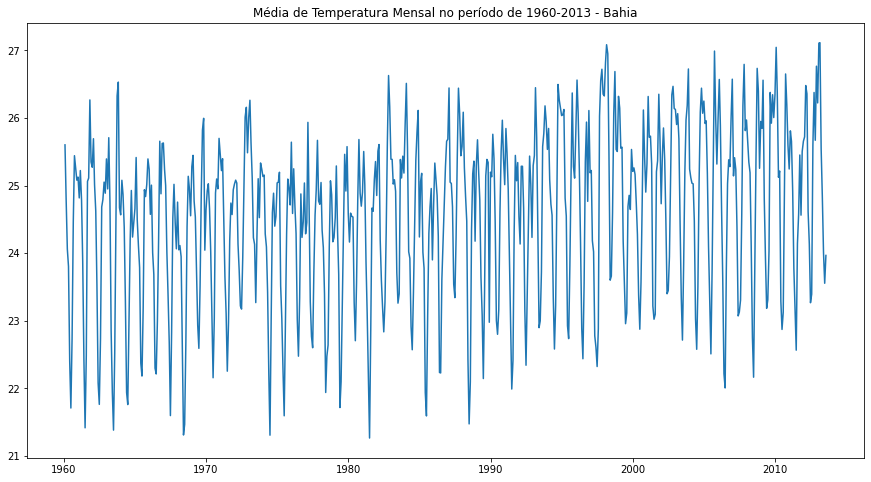

In [26]:
plt.figure(figsize=[15, 8])
plt.plot(Bahia.index, Bahia.AverageTemperature)
plt.title('Média de Temperatura Mensal no período de 1960-2013 - Bahia')

Text(0.5, 1.0, 'Média de Temperatura Mensal no período de 1960-2013 - Minas Gerais')

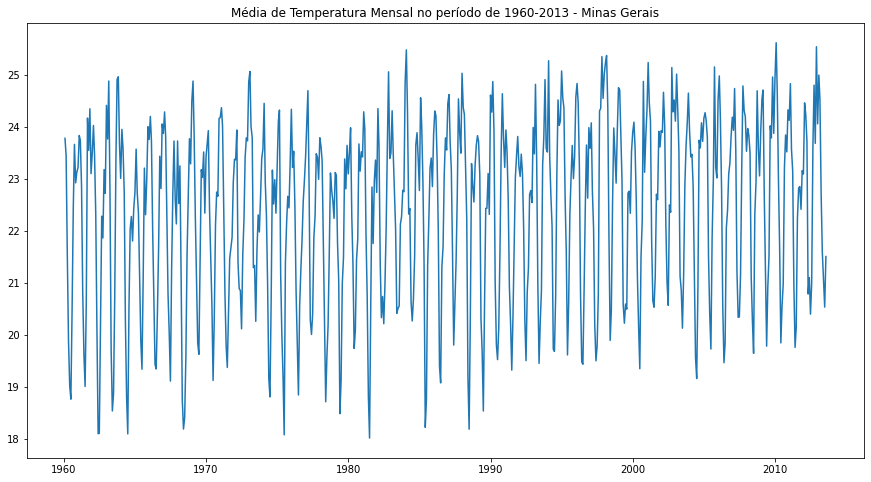

In [27]:
plt.figure(figsize=[15, 8])
plt.plot(MG.index, MG.AverageTemperature)
plt.title('Média de Temperatura Mensal no período de 1960-2013 - Minas Gerais')

# Comparação Bahia vs Minas Gerais & Rio De Janeiro
Comparando a temperatura média da Bahia com outros estados de proporção parecida.

E para essas comparações, nós utilizaremos o scatter plot, geralmente associamos time series com linhas no gráfico, mas com os pontinhos fica muito fácil observar se a dispersão das temperaturas médias é parecido com um estado ou outro, se um atinge o pico do outro, diferenças de sazonalidade, etc.

## Bahia vs Rio de Janeiro

Text(0.5, 1.0, 'Média de Temperatura: MG vs BH')

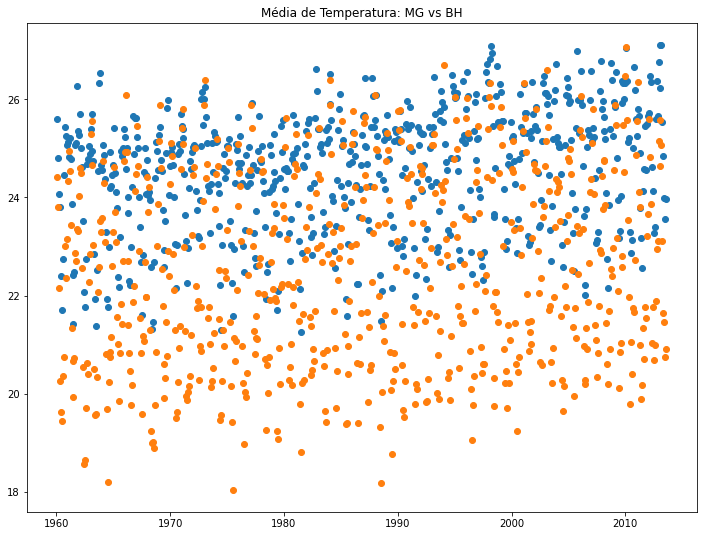

In [28]:
plt.figure(figsize=[12, 9])
x = Bahia.index 
plt.scatter(x, Bahia['AverageTemperature'])
plt.scatter(x, RJ['AverageTemperature'] )
plt.title('Média de Temperatura: MG vs BH')

## Bahia vs Minas Gerais

Text(0.5, 1.0, 'Média de Temperatura: MG vs BH')

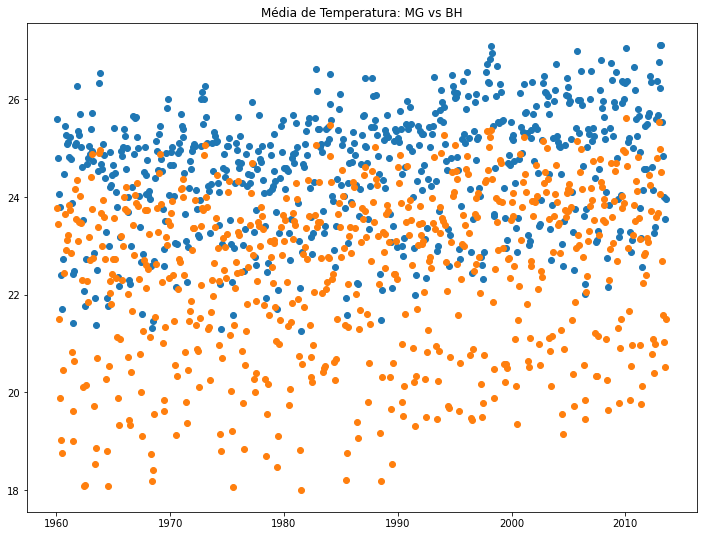

In [29]:
plt.figure(figsize=[12, 9])
x = Bahia.index 
plt.scatter(x, Bahia['AverageTemperature'])
plt.scatter(x, MG['AverageTemperature'] )
plt.title('Média de Temperatura: MG vs BH')

## Conclusão das duas comparações

###Bahia vs Rio De Janeiro:
É Possível notar que os dias mais quentes, Bahia e Rio de Janeiro são semelhantes, mas o Rio em sua totalidade, nos seus dias mais frios é mais frio que a Bahia.

###Bahia vs Minas Gerais:
Mais uma vez a Bahia perde nos dias mais frios, um Estado que possuí médias de temperaturas mais elevadas do que os Estados usados para comparação, mas ao contrário do Rio de Janeiro que na parte de cima do gráfico estava bem disperso junto com a Bahia (pontinhos azuis de um lado, laranja do outro), Minas Gerais tende a ter pontos no meio e tem pontos laranjas onde não existe sequer um ponto azul.

# Vendo a tendência

O Gráfico abaixo mostra uma tendência de aumento da temperatura, mas ela não é tão fácil de ser notada, é assustador mesmo sendo um grau apenas de aumento, em nossas previsões iremos ver o que o modelo Prophet do Facebook acha sobre essa tendência e o quanto esse modelo aumentará de temperatura até certo ano.

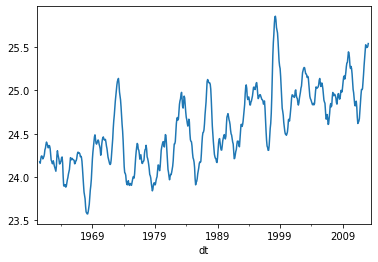

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(Bahia['AverageTemperature'])
a = decompose.trend
a.plot()

# Previsões

O Facebook disponibiliza uma biblioteca para previsões chamada Prophet, e os resultados são bem completos trazendo muitos atributos como o máximo da previsão ou o minimo.

In [ ]:
!pip install pmdarima

In [32]:
from fbprophet import Prophet

In [33]:
m = Prophet() 

In [34]:
Bahia['ds'] = Bahia.index
Bahia['y'] = Bahia['AverageTemperature']
m.fit(Bahia)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
future = m.make_future_dataframe(periods=110, freq='MS')
future.tail()

,ds
748,2022-06-01
749,2022-07-01
750,2022-08-01
751,2022-09-01
752,2022-10-01


In [49]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(110)

,ds,yhat,yhat_lower,yhat_upper
643,2013-09-01,25.478887,24.813766,26.174105
644,2013-10-01,26.151572,25.464342,26.874486
645,2013-11-01,26.102331,25.461219,26.744854
646,2013-12-01,25.842325,25.143925,26.537336
647,2014-01-01,25.936122,25.218512,26.581331
...,...,...,...,...
748,2022-06-01,23.620934,22.909959,24.294965
749,2022-07-01,23.208569,22.564177,23.868771
750,2022-08-01,24.086616,23.418437,24.745683
751,2022-09-01,25.591237,24.912303,26.245254


## Padrão

O nosso modelo como qualquer outro, generalizou nossa série temporal criando um padrão, na tabela acima é possível ver 4 Atributos:


*   DS = Data, mensal
*   yhat = Previsão, faz parte do intervalo
*   yhat_lower = Valor mais baixo que o modelo poderia prever
* yhat_upper = Valor mais alto que o modelo poderia prever



Text(0.5, 1.0, 'Média de Temperatura: MG vs BH e previsões')

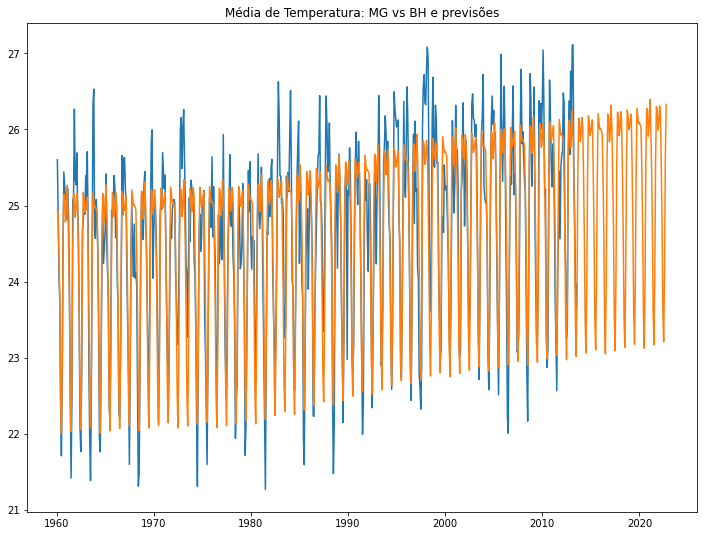

In [50]:
plt.figure(figsize=[12, 9])
x = Bahia.index 
plt.plot(x, Bahia['AverageTemperature'])
plt.plot(forecast['ds'], forecast['yhat'] )
plt.title('Média de Temperatura: MG vs BH e previsões')

## 2050

Que tal vermos o que o nosso modelo tendencia até 2050?

Ele colocou que até 2050 teremos mais ou menos uma média de 26 até 27, lembrando que isso é o intervalo, ou seja no yhat_upper pode estar beirando 29, o que é grave, para os gráfico eu escolhi a previsão yhat da biblioteca Prophet, mas já é possível ver a clara tendência de crescimento.

Text(0.5, 1.0, 'Média de Temperatura: MG vs BH e previsões')

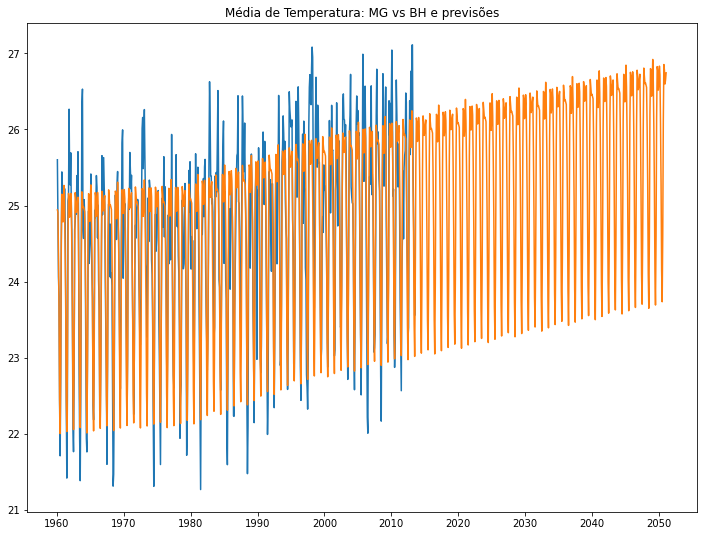

In [51]:
future1 = m.make_future_dataframe(periods=450, freq='MS')
forecast1 = m.predict(future1)
plt.figure(figsize=[12, 9])
x = Bahia.index 
plt.plot(x, Bahia['AverageTemperature'])
plt.plot(forecast1['ds'], forecast1['yhat'] )
plt.title('Média de Temperatura: MG vs BH e previsões')

# Obrigado

Mais uma vez, caso tenha sugestões, dicas para mim, raisler.dev@gmail.com